In [1]:
import networkx as nx
import matplotlib as plt
import numpy as np
import pandas as pd
import csv


In [23]:
 for i in range(len(pathBandList)):
        successflag=0
        path_band=pathBandList[i]
        if(Max[i]>bandwidth):
            if(wave+bandwidth>160):
                break
            for j in path_band:
                if(wave>=j[0] and wave+bandwidth<=j[1]):
                    successflag=1
                    break
        if(successflag==1):
            availablePath.append(PathList[i])
            PathHops.append(hopsList[i])
    if(len(availablePath)>0):
        Path=[]
        minHops=min(PathHops)
        pathIndex=[index for index, value in enumerate(PathHops) if value==minHops]
        for i in pathIndex:
            Path.append(availablePath[i])
        randomseed=np.random.randint(len(availablePath))
        return availablePath[randomseed]
    else:
        return []
            
    
    

IndentationError: unindent does not match any outer indentation level (<ipython-input-23-fde39e4b7f20>, line 14)

In [24]:
def zero_runs(a):
    # Create an array that is 1 where a is 0, and pad each end with an extra 0.
    iszero = np.concatenate(([0], np.equal(a, 0).view(np.int8), [0]))
    absdiff = np.abs(np.diff(iszero))
    # Runs start and end where absdiff is 1.
    ranges = np.where(absdiff == 1)[0].reshape(-1, 2)
    return ranges      

def pathBand(path):
    path_len=len(path)
    #print(path)
    #print(path[0][0])
    resource=Resource[path[0][0]][path[0][1]][path[0][2]]
    for i in range(1,path_len):
        resource=list(map(lambda x: x[0]+x[1], zip(resource, Resource[path[i][0]][path[i][1]][path[i][2]])))
    pathbandList=zero_runs(resource) 
    
    return pathbandList

In [25]:
# the functions used to select wavelength and path

def randomWave(wavelist):
    random_seed=np.random.randint(len(wavelist))
    return wavelist[random_seed]

def randomPath(PathList,hopsList,wave,bandwidth,pathBandList):
    Max=np.zeros(len(pathBandList))
    Sum=np.zeros(len(pathBandList))
    for i in range(len(pathBandList)):
        #print (pathBandList[i][:,1] - pathBandList[i][:,0])
        #print(i)
        #print(PathList[0])
        Max[i]=max(pathBandList[i][:,1] - pathBandList[i][:,0])
        Sum[i]=sum(pathBandList[i][:,1] - pathBandList[i][:,0])
 
    minHop=min(hopsList)
    for i in range(max(hopsList)-minHop):
        MinHop=minHop+i
        pathIndex=[index for index, value in enumerate(hopsList) if value==MinHop]
        Path=[]
        PathBand=[]
        availablePath=[]
        PathHops=[]
        for j in pathIndex:
            Path.append(PathList[j])
            PathBand.append(pathBandList[j])
        for k in range(len(PathBand)):
            successflag=0
            path_band=PathBand[k]
            if(Max[i]>bandwidth):
                if(wave+bandwidth>160):
                    break
                for j in path_band:
                    if(wave>=j[0] and wave+bandwidth<=j[1]):
                        successflag=1
                        break
            if(successflag==1):
                availablePath.append(Path[k])
        if(len(availablePath)):
            randomseed=np.random.randint(len(availablePath))
            return availablePath[randomseed]
            break
        
    if(len(availablePath)==0):
        return []
            
            
                
            
        
        
        
   

In [26]:
def pathBand_Ocuupy(loc1,loc2,wave1,band,index):
    path=SD_pathLink[loc1][loc2]
    pathBand=ALL_SD_bandwidth[loc1][loc2]
    for i in range(len(path)):
        for j in range(band):
            #print(path)
            #print(wave1)
            #print(Resource[path[i][0]][path[i][1]][path[i][2]][wave1+j])
            Resource[path[i][0]][path[i][1]][path[i][2]][wave1+j]+=index+1
            
    return

        
def pathUpdate():
    SR_bandwidth=[]
    #MaxBand=[]
    Hops=[]
    for i in range(len(SD_pathLink)):
        band=[]
        #Max=[]
        hops=[]        
        for j in range(len(SD_pathLink[i])):
            #cost.append(pathCost(SD_pathLink[i][j]))
            hops.append(len(SD_pathLink[i][j]))
            b=pathBand(SD_pathLink[i][j])
            #Max.append(max(b[:,1] - b[:,0]))
            band.append(b)            
        #SR_pathLink_cost.append(cost)
        SR_bandwidth.append(band)
        #MaxBand.append(Max)
        Hops.append(hops)
    global ALL_SD_bandwidth
    ALL_SD_bandwidth=SR_bandwidth
        
    return

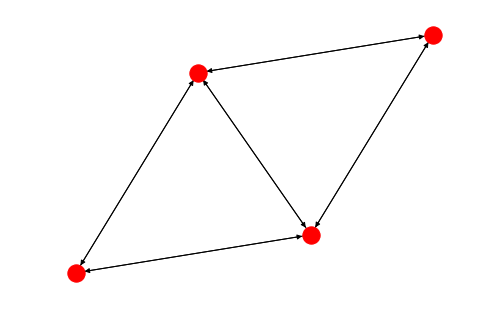

In [27]:
   
def edgeToLinks(path):
    pathlist=[]
    path_len=len(path)
    corePossib=7**path_len
    for i in range(corePossib):
        List=[]
        List.append((path[0]+(i%7,)))

        for j in range(1,path_len):
            List.append((path[j]+(int((i/(7**j)%7)),)))
        if(len(List)>0):
            pathlist.append(List)    
    return pathlist



TrafficCost=0
node_list=[0,1,2,3]
SR_pair=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(0,3),(3,0),(1,3),(3,1)]
edges_list=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(1,3),(3,1)]
"""
bypassEdges=[]
In_bypassEdges=[]
Out_bypassEdges=[]
for i in range(len(edges_list)):
    BY=[]
    BY0=[]
    BY1=[]
    
    for j in range(7):
        BY.append([])
        BY0.append([])
        BY1.append([])
    bypassEdges.append(BY)
    In_bypassEdges.append(BY0)
    Out_bypassEdges.append(BY1)
    
"""
   
#先对D=2的节点进行bypass设置，在对D=3的节点进行bypass设置
#每次设置都在该link中不存在

G=nx.DiGraph()
G.add_nodes_from(node_list)
G.add_edges_from(edges_list)
nx.draw(G)

#plt.show()


link_list=[] 

for k in range(len(edges_list)):
    link_list0=[]
    for i in range(7):
        link_list0.append(edges_list[k]+(i,)) 
    link_list.append(link_list0)

SD_path=[]

for i in range(len(SR_pair)):
    path0=[]
    for path in nx.all_simple_paths(G, source=SR_pair[i][0], target=SR_pair[i][1]):
        path_edges=[]            
        for j in range(len(path)-1):
            path_edges.append((path[j],path[j+1]))
        path0.append(path_edges)
    SD_path.append(path0)


        
SD_pathLink=[]  
for i in range(len(SD_path)):
    Links=[]
    for j in range(len(SD_path[i])):
        Links=Links+edgeToLinks(SD_path[i][j])
        
    SD_pathLink.append(Links)

    


In [61]:
Traffic_SD_pairs=[(0,1),(1,0),(1,2),(2,1),(0,2),(2,0),(2,3),(3,2),(0,3),(3,0),(1,3),(3,1)]
Bandwidth=[1,2,4,16]
Traffic_num=4000
Traffic=[]
for i in range(Traffic_num):
    random_seed=np.random.randint(48)
    if(random_seed<12):
        S_band=Bandwidth[0]
    if(random_seed<24 and random_seed>11):
        S_band=Bandwidth[1]
    if(random_seed<36 and random_seed>23):
        S_band=Bandwidth[2]
    if(random_seed<48 and random_seed>35):
        #S_band=Bandwidth[3]        
    Traffic.append(Traffic_SD_pairs[np.random.randint(len(Traffic_SD_pairs))]+(S_band,))
    
MyFile=open('traffic.csv','w')
writer=csv.writer(MyFile,lineterminator='\n')
for element in Traffic:
     writer.writerow(element)
MyFile.close()


In [62]:
#prepare for the traffic here
Total_bandwidth=161
Resource=np.zeros([4,4,7,161]).tolist()
ALL_SD_bandwidth=[]
#MaxBand=[]
Hops=[]
for i in range(len(SD_pathLink)):
    Band=[]
    #Max=[]
    Hhops=[]
    for j in range(len(SD_pathLink[i])):
        Hhops.append(len(SD_pathLink[i][j]))
        b=pathBand(SD_pathLink[i][j])
        #Max.append(max(b[:,1] - b[:,0]))
        Band.append(b)
    ALL_SD_bandwidth.append(Band)
    #MaxBand.append(Max)
    Hops.append(Hhops)

    

In [63]:
# generate traffic and then select the path
Traffic=pd.read_csv('traffic.csv',sep=',',names=['S','D','band'])
SuccessFlag=np.zeros(len(Traffic))
traffic_wave=[]
traffic_path=[]
for i in range(Traffic_num):
    traffic=(Traffic['S'][i],Traffic['D'][i])
    band=Traffic['band'][i]
    traffic_Path=SD_pathLink[SR_pair.index(traffic)]
    traffic_Hops=Hops[SR_pair.index(traffic)]
    traffic_Band=ALL_SD_bandwidth[SR_pair.index(traffic)]
    wave=list(range(Total_bandwidth-1))
    while(len(wave)):
        PathFlag=0
        select_wave=randomWave(wave)
        #print(select_wave)
        selectPath=randomPath(traffic_Path,traffic_Hops,select_wave,band,traffic_Band)
        if(len(selectPath)):
            Pathloc=traffic_Path.index(selectPath)
            pathBand_Ocuupy(SR_pair.index(traffic),Pathloc,select_wave,band,i)
            PathFlag=1
            traffic_wave.append(select_wave)
            traffic_path.append(selectPath)
            pathUpdate()
            break
        else:
            wave.remove(select_wave)
    
    if(PathFlag==1):
        SuccessFlag[i]=1
        
print(SuccessFlag) 

    


[1. 1. 1. ... 0. 1. 1.]


In [64]:
a=SuccessFlag.sum()
print(a)

3492.0


In [65]:
k=0
for i in range(Traffic_num):
    if(SuccessFlag[i]==1):
        k+=Traffic['band'][i]
print(k)

6495
